In [33]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [34]:
#путь к данным нужно заменить
data = pd.read_csv(r"C:\Users\memel\Desktop\ДЗ, лабы\Числаки\Лабораторная 1\housing.csv", sep = ',')
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [35]:
#цель y столбец 14, "иксы" с 1 по 13
k = 13
X, y = data.drop([data.columns[k]],axis = 1), data[data.columns[k]]
#конструктор признаков
poly = PolynomialFeatures(1, include_bias = False, interaction_only = True)
#делим на трейн и тест
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.22, random_state = 40)
X_train, X_test = poly.fit_transform(X_train), poly.fit_transform(X_test)
X_train.shape, X_test.shape

((394, 13), (112, 13))

In [36]:
pd.DataFrame(X_train, columns=X.columns)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.05735,0.0,4.49,0.0,0.449,6.630,56.1,4.4377,3.0,247.0,18.5,392.30,6.53
1,1.80028,0.0,19.58,0.0,0.605,5.877,79.2,2.4259,5.0,403.0,14.7,227.61,12.14
2,0.05083,0.0,5.19,0.0,0.515,6.316,38.1,6.4584,5.0,224.0,20.2,389.71,5.68
3,2.15505,0.0,19.58,0.0,0.871,5.628,100.0,1.5166,5.0,403.0,14.7,169.27,16.65
4,0.05497,0.0,5.19,0.0,0.515,5.985,45.4,4.8122,5.0,224.0,20.2,396.90,9.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,22.05110,0.0,18.10,0.0,0.740,5.818,92.4,1.8662,24.0,666.0,20.2,391.45,22.11
390,2.92400,0.0,19.58,0.0,0.605,6.101,93.0,2.2834,5.0,403.0,14.7,240.16,9.81
391,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
392,0.11425,0.0,13.89,1.0,0.550,6.373,92.4,3.3633,5.0,276.0,16.4,393.74,10.50


In [37]:
#скейлер сейчас "молчит"
scale = StandardScaler(with_mean = False, with_std = False)
#обучаем линейную модель (библиотечное решение)
model = LinearRegression(fit_intercept = False)
model = model.fit(X_train, y_train)
#средняя абсолютная ошибка при тестировании, коэффициент детерминации, число ненулевых
mean_absolute_error(model.predict(X_train),y_train), mean_absolute_error(model.predict(X_test),y_test)

(3.0295754451525436, 4.013209570135492)

In [38]:
#теоретически точное решение
a = np.linalg.inv((X_train.T)@X_train)@X_train.T@y_train
mean_absolute_error(X_train@a,y_train), mean_absolute_error(X_test@a,y_test)

(3.0295754451525263, 4.013209570135546)

# 1 задание

Система должна выглядеть так: $X \alpha = y$. Мы хотим уменьшить ошибку приближения. Ошибка равняется $(\left \lVert X\alpha - y \right \rVert_2)^2$. Минимум функции ошибки достигается при градиенте данной функции = 0. Взяв частные производные и составив из них СЛАУ, мы получим систему $X^T X \alpha = X^T y$.

Здесь $X$ - данные без столбца 'MEDV', $y$ - столбец 'MEDV', а $\alpha$ - вектор весов модели.

Добавим столбец единиц в данные для свободного коэффициента в векторе весов

In [39]:
X_train = np.hstack([np.ones((X_train.shape[0],1)), X_train])

XTX = X_train.T @ X_train
XT = X_train.T

Число обусловленности матрицы $X^T X$:

In [40]:
cond_value = np.linalg.cond(XTX)
cond_value

np.float64(222455742.7990708)

# 2 задание

Вектор $\alpha$ находится как $\alpha = (X^T X)^{-1} X^T y$

In [41]:
try: 
    alpha = np.linalg.inv(XTX) @ XT @ y_train
except:
    print('Ошибка вычисления!')

Также добавим в матрицу X_test столбец с 1. Чтобы размеры совпадали. 

In [42]:
X_test = np.hstack([np.ones((X_test.shape[0],1)), X_test])

Сейчас размеры матриц следующие:
- X_train: 394 x 14
- XT: 14 x 394
- XTX: 14 x 14
- y_train: 394 x 1
- X_test: 112 x 14
- y_test: 112 x 1
- alpha: 14 x 1

Что позволяет произвести операции умножения корректно.

In [43]:
y_train_predict = X_train @ alpha
y_test_predict = X_test @ alpha

print(f'MAE на train data: {mean_absolute_error(y_train_predict, y_train)}')
print(f'MAE на test data: {mean_absolute_error(y_test_predict, y_test)}')

MAE на train data: 2.9926479054904944
MAE на test data: 4.104675532924377


Видим переобучение, также как и у линейной регрессии из SKlearn.

# Изобразим на графике

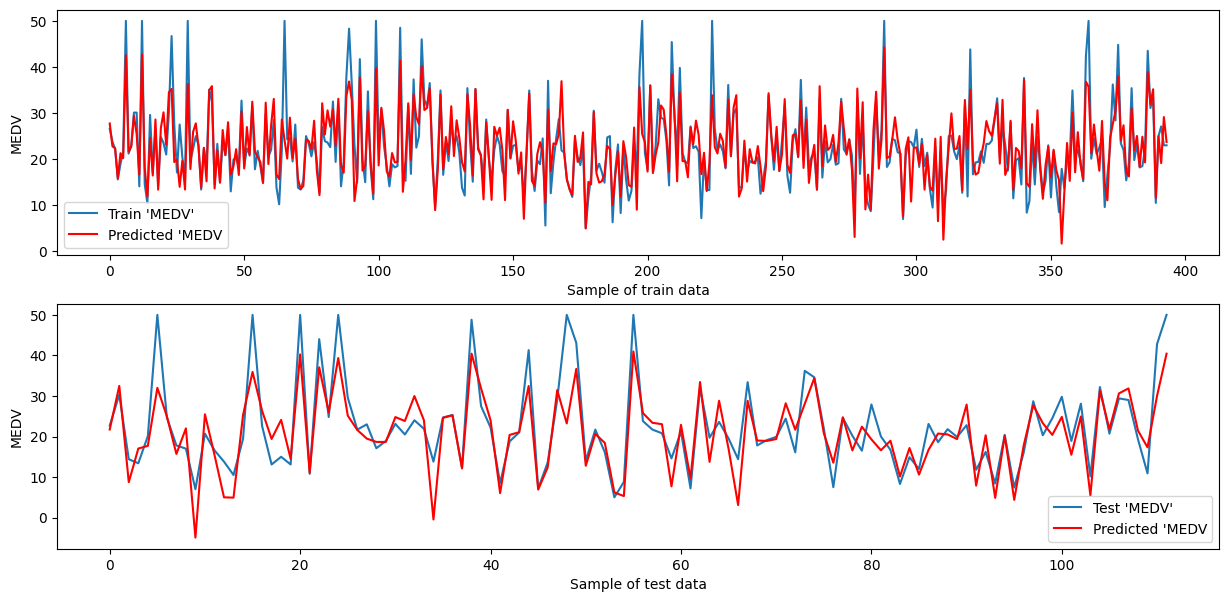

In [44]:
fig, ax = plt.subplots(2, 1, figsize=(15,7))

ax[0].plot(np.arange(y_train.shape[0]), y_train, label="Train 'MEDV'")
ax[0].plot(np.arange(y_train.shape[0]), y_train_predict, color='r', label="Predicted 'MEDV")

ax[1].plot(np.arange(y_test.shape[0]), y_test, label="Test 'MEDV'")
ax[1].plot(np.arange(y_test.shape[0]), y_test_predict, color='r', label="Predicted 'MEDV")

ax[0].set_xlabel('Sample of train data')
ax[0].set_ylabel('MEDV')
ax[1].set_xlabel('Sample of test data')
ax[1].set_ylabel('MEDV')

ax[0].legend()
ax[1].legend()
plt.show()

# Дополняем с помощью Polynomial features степени 2 и 3

## Степень 2

In [45]:
poly2 = PolynomialFeatures(2, include_bias=False, interaction_only=False)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.22, random_state = 40)
X_train, X_test = poly2.fit_transform(X_train), poly2.fit_transform(X_test)
X_train.shape, X_test.shape

((394, 104), (112, 104))

In [46]:
X_train = np.hstack([np.ones((X_train.shape[0],1)), X_train])
X_test = np.hstack([np.ones((X_test.shape[0],1)), X_test])

In [47]:
cond2 = np.linalg.cond(X_train.T @ X_train)
cond2

np.float64(4.802028445456998e+19)

Обусловленность очень большая, поэтому мы получаем ошибку при вычислении обратной матрицы

In [48]:
try:
    alpha2 = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
except:
    print('Ошибка вычисления!')

Ошибка вычисления!


Используем псевдообратную матрицу

In [49]:
alpha2 = np.linalg.pinv(X_train) @ y_train
alpha2.shape

(105,)

In [50]:
y_train_predict = X_train @ alpha2
y_test_predict = X_test @ alpha2

print(f'MAE на train data: {mean_absolute_error(y_train_predict, y_train)}')
print(f'MAE на test data: {mean_absolute_error(y_test_predict, y_test)}')

MAE на train data: 1.646584799283454
MAE на test data: 3.1393750135457985


## Степень 3

In [51]:
poly3 = PolynomialFeatures(3, include_bias=False, interaction_only=False)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.22, random_state = 40)
X_train, X_test = poly3.fit_transform(X_train), poly3.fit_transform(X_test)
X_train.shape, X_test.shape

((394, 559), (112, 559))

In [52]:
X_train = np.hstack([np.ones((X_train.shape[0],1)), X_train])
X_test = np.hstack([np.ones((X_test.shape[0],1)), X_test])
cond2 = np.linalg.cond(X_train.T @ X_train)
cond2

np.float64(1.18048512645365e+35)

Обусловленность уже слишком огромна

In [53]:
try:
    alpha2 = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
except:
    print('Ошибка вычисления!')

Ошибка вычисления!


In [54]:
alpha3 = np.linalg.pinv(X_train) @ y_train
alpha3.shape

(560,)

In [55]:
y_train_predict = X_train @ alpha3
y_test_predict = X_test @ alpha3

print(f'MAE на train data: {mean_absolute_error(y_train_predict, y_train)}')
print(f'MAE на test data: {mean_absolute_error(y_test_predict, y_test)}')

MAE на train data: 9.594168459354159e-08
MAE на test data: 262.0171576799141


Ужасное переобучение

# С использованием скейлера

In [56]:
poly3 = PolynomialFeatures(3, include_bias=False, interaction_only=False)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.22, random_state = 40)
X_train, X_test = poly3.fit_transform(X_train), poly3.fit_transform(X_test)
X_train.shape, X_test.shape

((394, 559), (112, 559))

In [57]:
scale = StandardScaler(with_mean=True, with_std=True)
scale.fit(X_train)
X_train = scale.transform(X_train) 
X_test = scale.transform(X_test)

In [58]:
X_train = np.hstack([np.ones((X_train.shape[0],1)), X_train])
X_test = np.hstack([np.ones((X_test.shape[0],1)), X_test])
cond = np.linalg.cond(X_train.T @ X_train)
cond

np.float64(6.685390566977307e+20)

In [59]:
try:
    beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
except:
    print('Ошибка вычисления!')

In [60]:
beta = np.linalg.pinv(X_train) @ y_train

А со скейлером и обусловленность меньше, и обратная матрица спокойно находится!



In [61]:
y_train_predict = X_train @ beta
y_test_predict = X_test @ beta

print(f'MAE на train data: {mean_absolute_error(y_train_predict, y_train)}')
print(f'MAE на test data: {mean_absolute_error(y_test_predict, y_test)}')

MAE на train data: 3.720594278239485e-11
MAE на test data: 77.4624678427203


Однако, не все так хорошо: ошибки взлетают в космос

# Выведем все результаты для сводной таблицы

In [62]:
def compute(X, y, polynom_deg=1, is_scaler=False):
    print(f'Степень полиномов: {polynom_deg}')
    print(f'Is_scaler: {is_scaler}')

    poly = PolynomialFeatures(polynom_deg, include_bias=False, interaction_only=False)
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.22, random_state = 40)
    X_train, X_test = poly.fit_transform(X_train), poly.fit_transform(X_test)

    if is_scaler:
        scale = StandardScaler(with_mean=True, with_std=True)
        scale.fit(X_train)
        X_train = scale.transform(X_train) 
        X_test = scale.transform(X_test)

    X_train = np.hstack([np.ones((X_train.shape[0],1)), X_train])
    X_test = np.hstack([np.ones((X_test.shape[0],1)), X_test])
    cond = np.linalg.cond(X_train.T @ X_train)
    print(f'Число обусловленности: {cond}')

    try:
        beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
    except:
        print('Ошибка вычисления!')
        beta = np.linalg.pinv(X_train) @ y_train
    
    y_train_predict = X_train @ beta
    y_test_predict = X_test @ beta

    mae_train = mean_absolute_error(y_train_predict, y_train)
    mae_test = mean_absolute_error(y_test_predict, y_test)
    print(f'MAE на train data: {mae_train}')
    print(f'MAE на test data: {mae_test}')

    return [cond, mae_train, mae_test]

In [63]:
cond_train_test = []
cond_train_test.append(compute(X, y, polynom_deg=1, is_scaler=False))
cond_train_test.append(compute(X, y, polynom_deg=1, is_scaler=True))
cond_train_test.append(compute(X, y, polynom_deg=2, is_scaler=False))
cond_train_test.append(compute(X, y, polynom_deg=2, is_scaler=True))
cond_train_test.append(compute(X, y, polynom_deg=3, is_scaler=False))
cond_train_test.append(compute(X, y, polynom_deg=3, is_scaler=True))

Степень полиномов: 1
Is_scaler: False
Число обусловленности: 222455742.7990708
MAE на train data: 2.9926479054904944
MAE на test data: 4.104675532924377
Степень полиномов: 1
Is_scaler: True
Число обусловленности: 87.527996755248
MAE на train data: 2.9926479054907578
MAE на test data: 4.104675532924213
Степень полиномов: 2
Is_scaler: False
Число обусловленности: 4.802028445456998e+19
Ошибка вычисления!
MAE на train data: 1.646584799283454
MAE на test data: 3.1393750135457985
Степень полиномов: 2
Is_scaler: True
Число обусловленности: 8.203725098291234e+18
MAE на train data: 9.301125855054194
MAE на test data: 9.812006733588333
Степень полиномов: 3
Is_scaler: False
Число обусловленности: 1.18048512645365e+35
Ошибка вычисления!
MAE на train data: 9.594168459354159e-08
MAE на test data: 262.0171576799141
Степень полиномов: 3
Is_scaler: True
Число обусловленности: 6.685390566977307e+20
MAE на train data: 7174175158308086.0
MAE на test data: 7.248697912123345e+20


Визуализация результатов экспериметов

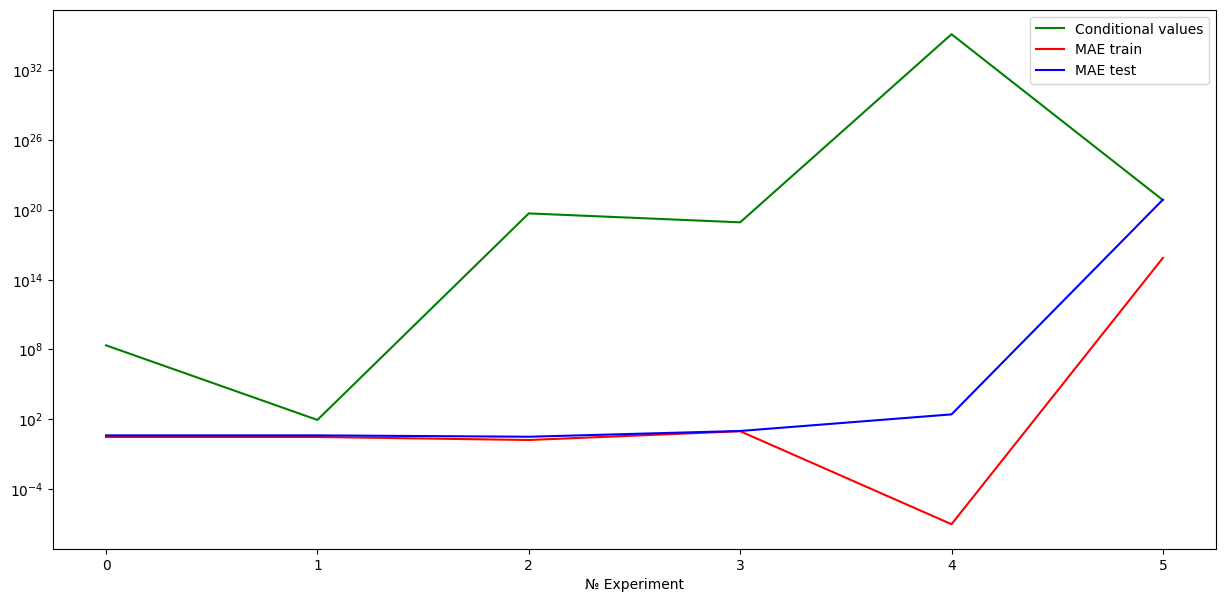

In [64]:
fig = plt.figure(figsize=(15,7))
plt.yscale('log')

conds = [cond for cond,_,_ in cond_train_test]
maes_train = [mae_train for _,mae_train,_ in cond_train_test]
maes_test = [mae_test for _,_,mae_test in cond_train_test]

plt.plot(np.arange(len(maes_train)), conds, color='g', label='Conditional values')
plt.plot(np.arange(len(maes_train)), maes_train, color='r', label='MAE train')
plt.plot(np.arange(len(maes_test)), maes_test, color='b', label='MAE test')

plt.legend()
plt.xlabel('№ Experiment')
plt.show()